In [4]:
#Импорт библиотек
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import f_oneway
from IPython.display import Image
import matplotlib.pyplot as plt

Задание № 1 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

In [7]:
# H0 - эффект от препаратов одинаковый
# H1 - эффект отличается
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

#Проведем тест для независимых выборок
stat, p = mannwhitneyu(A, B)  
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05   
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0), эффект от препаратов одинаковый')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4343.000, p=0.054
Одинаковые распределения (не отвергаем H0), эффект от препаратов одинаковый


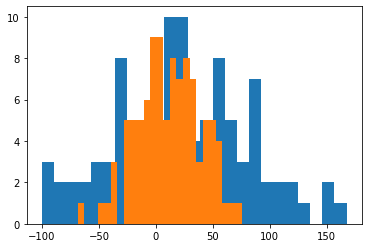

In [5]:
plt.hist(B, bins=25);
plt.hist(A, bins=25);

Задание № 2 Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

А - группа людей без препарата.

B - та же группа людей, но получающая препарат

In [8]:
# Н0 - эффект у пациентов с препаратом и без не отличается
# Н1 - эффект у пациентов с препаратом отличается от пациентов без препарата
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

#Проведем тест для зависимых выборок
stat, p = wilcoxon(A, B)  
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05  
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0), эффект от препаратов одинаковый')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


Задание № 3 Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist



In [10]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [11]:
# Н0 - эффект от удобрения и минералки одинаков
# Н1 - эффект от удобрения и минералки различается

In [12]:
F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0). Эффект от удобрения и минералки одинаков')
else:
    print('Разное распределение (отклоняем H0). Эффект от удобрения и минералки различается')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0). Эффект от удобрения и минералки различается


Cookie Cats

Данные A/B тестирования

In [13]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиция для подтверждения ваших выводом.

In [14]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [15]:
#Обе выборки практически равны по размеру и достаточно большие по количеству значений.


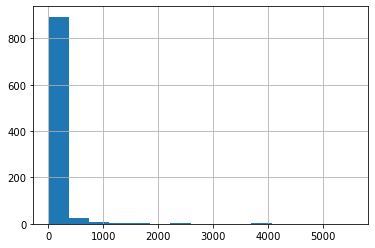

In [22]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=15) 

In [23]:
# По графику видно, что основное количество игроков сосредоточено на первых раундах игры, 
# затем подавляющее большинство бросают играть

Text(0.5, 0, '# Game rounds')

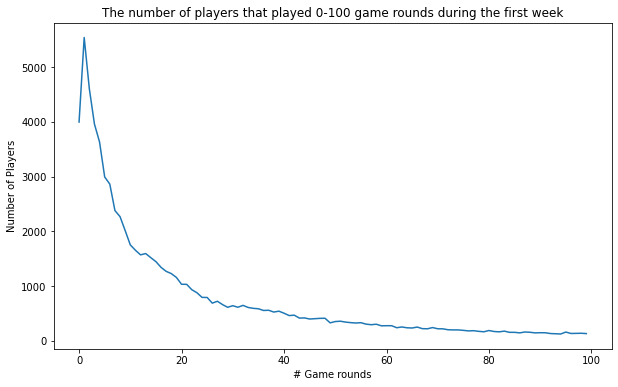

In [24]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

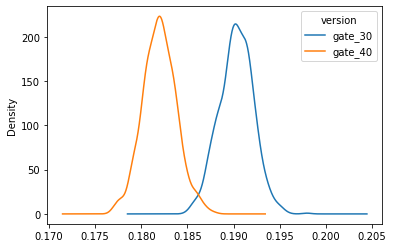

In [25]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

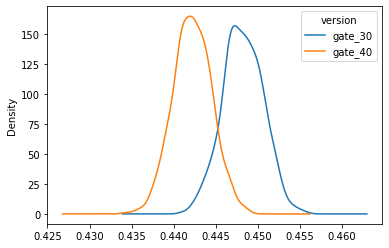

In [26]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

По графикам видно, что средние сгенерированной выборки из генеральной сопокупности для gate 30 больше, чем для gate 40 и для тех, кто вернулся через 1 день после установки, и для тех, кто вернулся через 7 дней после установки. Исходя из этого, можно сказать, что вариант gate 30 более удачен.

In [27]:
#Проверим это с помощью t-критерия Стьюдента
# H0: средние сгенерированной выборки для gate 30 и gate 40 одинаковы
# H1: средние сгенерированной выборки для gate 30 и gate 40 различается
alpha = 0.05

result = stats.ttest_ind(data[data.version == 'gate_30']['sum_gamerounds'], data[data.version == 'gate_40']['sum_gamerounds'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средние сгенерированных выборок различается')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.8854374331270672, pvalue=0.37592438409326223)
Не отвергаем нулевую гипотезу


По результатам теста статистически значимой разницы между выборками нет, но т.к. значение statistic имеет  положительную тенденцию, можем сказать, что есть некоторое положительное отклонение в сторону выборки gate_30.